In [ ]:
!pip install kaggle

In [ ]:
!pip install tensorflow==2.16.0-rc0 scikit-learn==1.4.1.post1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: scikit-learn
 

In [ ]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                             title                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------  ---------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data              Vehicle Sales Data                  19MB  2024-02-21 20:16:17           7178        121  1.0              
tarunrm09/climate-change-indicators             Climate change Indicators           34KB  2024-02-22 08:53:54           3554         89  1.0              
nbroad/gemma-rewrite-nbroad                     gemma-rewrite-nbroad                 8MB  2024-03-03 04:52:39            295         44  1.0              
nelgiriyewithana/emotions                       Emotions                            16MB  2024-02-05 16:01:39           5437        155  1.0              
nelgiriyewithana/apple-quality                  Apple Quality         

In [ ]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

 87% 57.0M/65.2M [00:01<00:00, 43.7MB/s]
100% 65.2M/65.2M [00:01<00:00, 41.0MB/s]


In [ ]:
!unzip emotion-detection-fer.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

In [ ]:
import os
import cv2
import requests
import numpy as np
import pandas as pd
from PIL import Image

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array

In [ ]:
generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = generator.flow_from_directory(
    '/content/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.


In [ ]:
test_data = generator.flow_from_directory(
    '/content/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 7178 images belonging to 7 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size=3, strides=(2, 2), activation='relu', padding='valid', input_shape=[224, 224, 3]))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(128, kernel_size=3, strides=(2, 2), activation='relu', padding='valid'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 111, 111, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         802,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 954,247 (3.64 MB)

 Trainable params: 954,247 (3.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(
    train_data,
    epochs=50,
    batch_size=32,
    verbose=1,
)

Epoch 1/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.5443 - loss: 1.1269
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 36s 39ms/step - accuracy: 0.5566 - loss: 1.0978
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step - accuracy: 0.5503 - loss: 1.1016
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - accuracy: 0.5593 - loss: 1.0722
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.5656 - loss: 1.0600
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 34s 37ms/step - accuracy: 0.5707 - loss: 1.0528
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - accuracy: 0.5802 - loss: 1.0268
Epoch 8/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 44s 39ms/step - accuracy: 0.5787 - loss: 1.0308
Epoch 9/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 34s 38ms/step - accuracy: 0.5797 - loss: 1.0262
Epoch 10/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.5830 - loss: 1.0160
Epoch 11/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.5896 - loss: 0.9987
Epoch 12/50
898/898 ━━━━━━━━━━

In [ ]:
results = model.evaluate(test_data)
results

225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.4469 - loss: 3.0029


[3.052426815032959, 0.4470604658126831]

In [ ]:
xml = '/content/haarcascade_frontalface_default.xml'

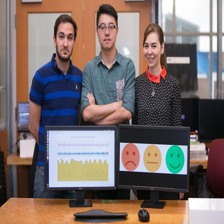

In [ ]:
image = Image.open(requests.get('https://news.mit.edu/sites/default/files/images/201609/mit-csail-emotion-sensor-eq-radio-01.jpg', stream=True).raw)
image = image.resize((224, 224))
image.save('sample.png')
image

In [ ]:
classifier = cv2.CascadeClassifier(xml)

In [ ]:
img = cv2.imread('sample.png')
faces = classifier.detectMultiScale(img)

In [ ]:
labels = list(train_data.class_indices.keys())
labels

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [ ]:
n = 0
for (x, y, w, h) in faces:
  n+=1
  face = img[y:y+h, x:x+w]
  face = cv2.resize(face, (224, 224))
  face = face/255
  emotion = model.predict(np.array([face]))
  emotion = labels[np.argmax(emotion)]
  print(emotion)
  img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
  img = cv2.putText(img, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
fearful
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
fearful


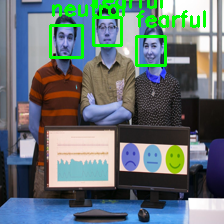

In [ ]:
Image.fromarray(img)

In [ ]:
model.save('Emotion_Detector.h5')